# 10x PAGET

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

/home/lebrigand/.conda/envs/jupyter/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.5.2.dev9+g69419872 anndata==0.7.1 umap==0.3.10 numpy==1.17.3 scipy==1.4.1 pandas==0.25.3 scikit-learn==0.21.3 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1


In [2]:
sc.settings.set_figure_params(dpi=130)

# wt
[Back to top](#wt)

In [3]:
wt = sc.read_h5ad('./output/wt.preprocessing.h5ad')
wt.shape

(3291, 12958)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


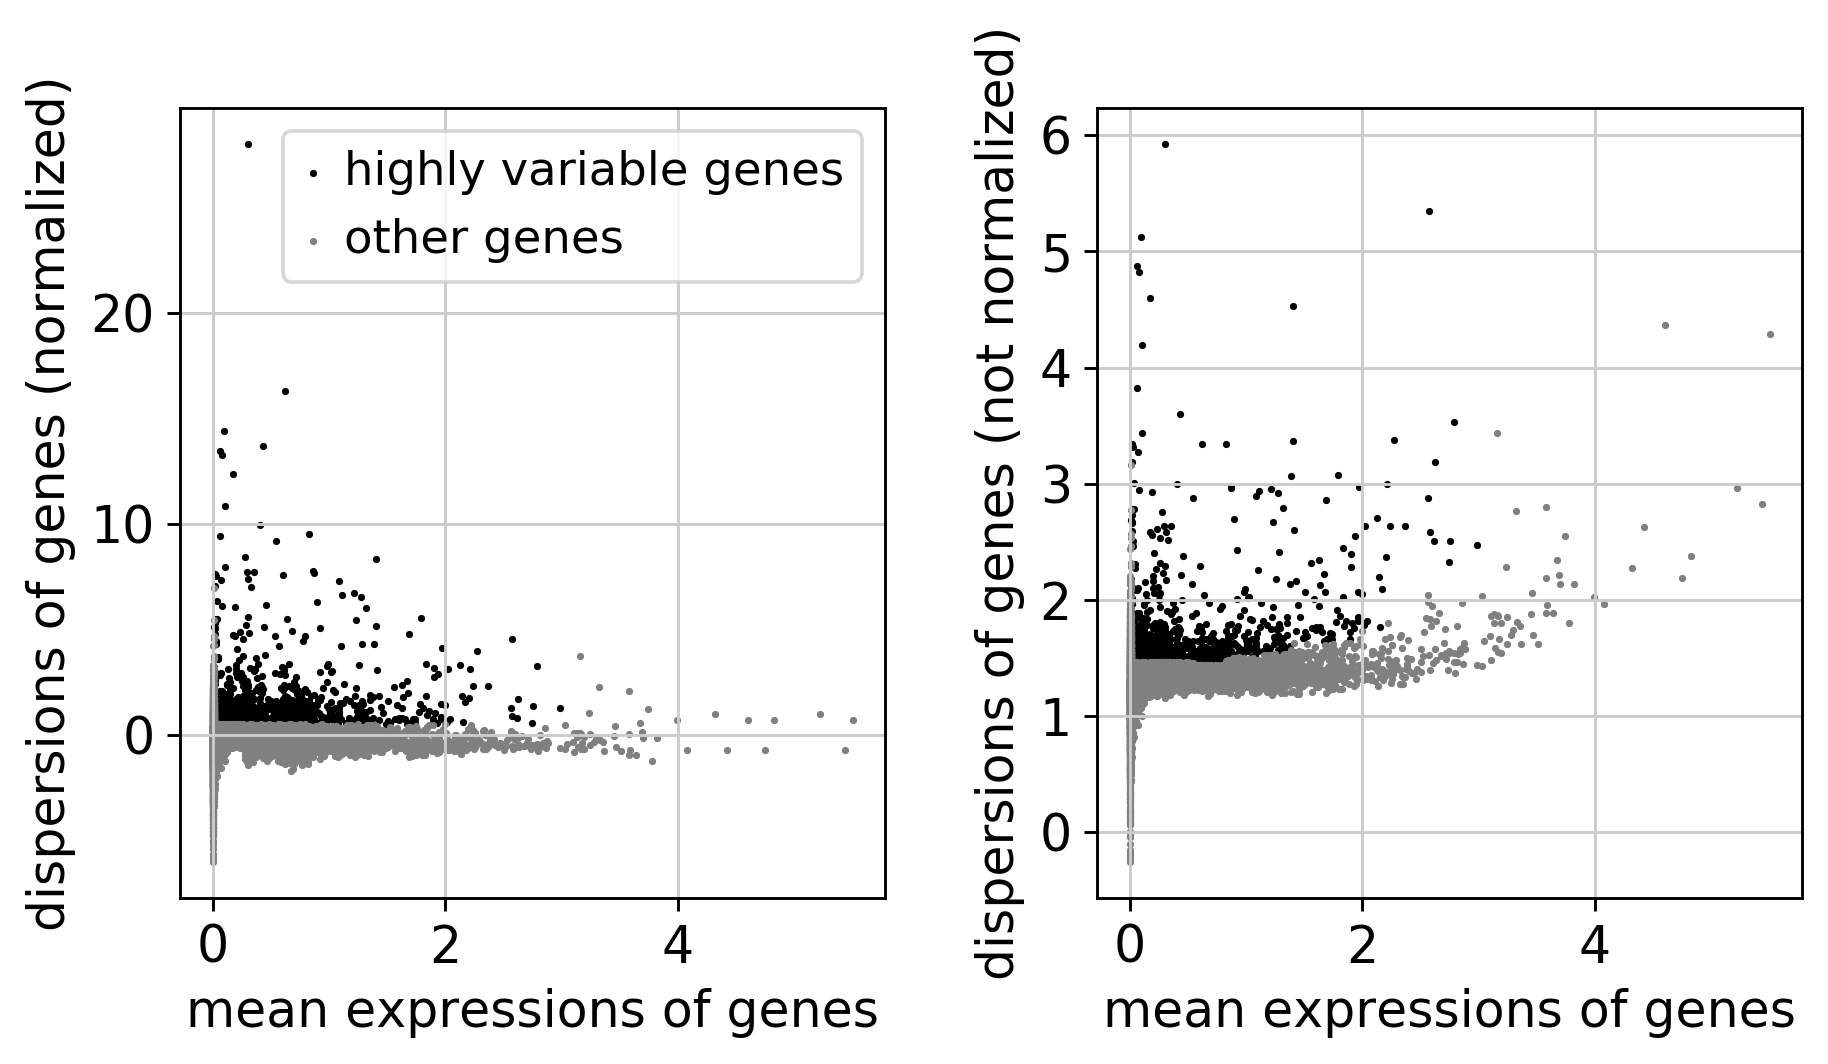

1807

In [4]:
#hvgs = adata_ko.var['highly_variable'].intersection(adata_wt.var['highly_variable'])
sc.pp.highly_variable_genes(wt, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(wt)
np.sum(wt.var['highly_variable'])

In [5]:
#wt = wt[:, wt.var['highly_variable']]

In [6]:
#sc.pp.regress_out(wt, ['n_counts'])

In [7]:
sc.pp.scale(wt, max_value=10)

In [8]:
sc.tl.pca(wt, svd_solver='arpack')

computing PCA with n_comps = 50
    on highly variable genes
    finished (0:00:00)


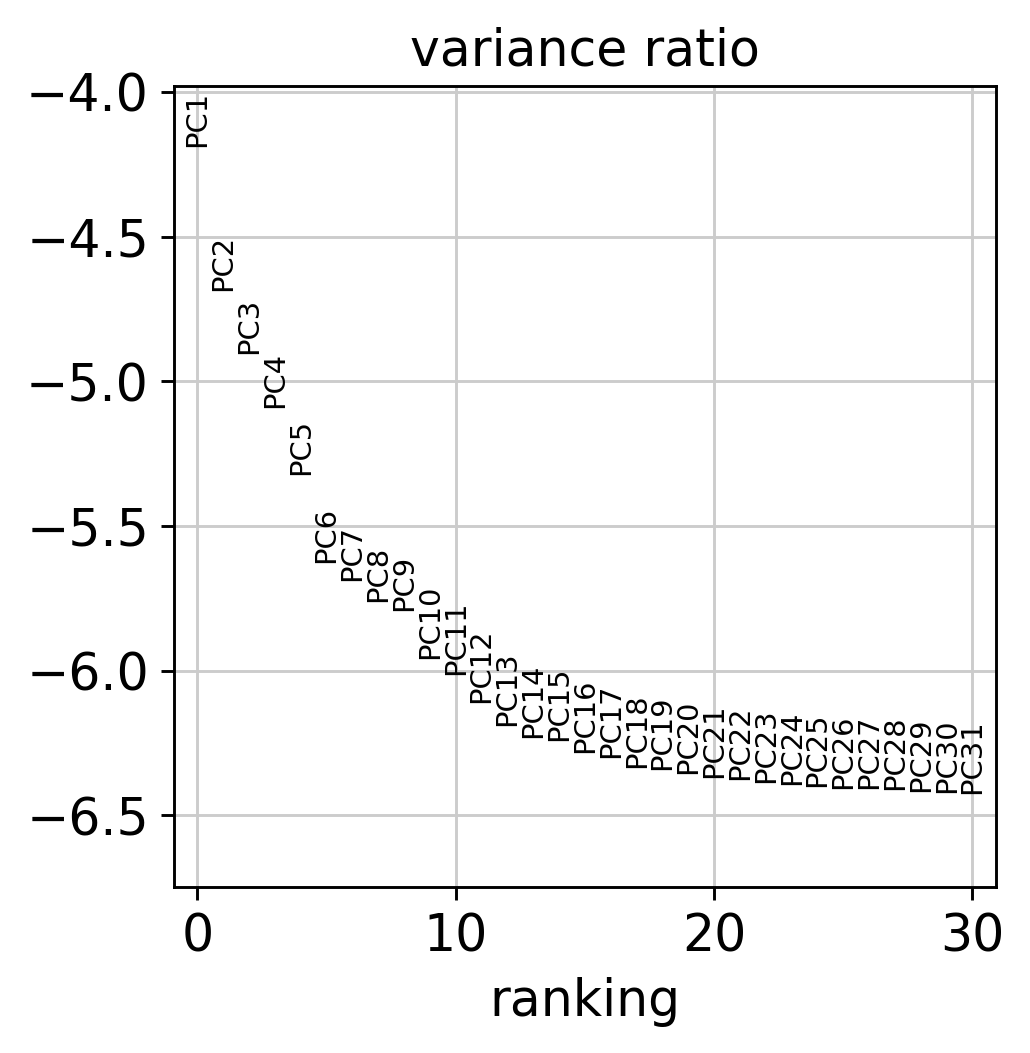

In [9]:
sc.pl.pca_variance_ratio(wt, log=True)

In [10]:
sc.pp.neighbors(wt)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)


In [11]:
sc.tl.umap(wt)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


In [12]:
wt.obs

sample  n_genes  percent_mito  percent_ribo  n_counts  \
AAACCTGAGATAGGAG-1     wt     3882      0.023835      0.282081   13080.0   
AAACCTGCAAACTGCT-1     wt     1532      0.027186      0.472325    2564.0   
AAACCTGCACAGAGGT-1     wt     1729      0.019697      0.418037    3464.0   
AAACCTGCACGAGGTA-1     wt     1472      0.021231      0.392310    2489.0   
AAACCTGCAGTCAGCC-1     wt     1205      0.035033      0.329171    1833.0   
...                   ...      ...           ...           ...       ...   
TTTGTCAGTTGTCTTT-1     wt     1870      0.022153      0.345661    3458.0   
TTTGTCATCAACACTG-1     wt     1758      0.016772      0.395422    2985.0   
TTTGTCATCAACTCTT-1     wt     1601      0.017723      0.309541    2778.0   
TTTGTCATCATCGGAT-1     wt     1652      0.023945      0.372915    3080.0   
TTTGTCATCCCGGATG-1     wt     1626      0.024395      0.433154    2828.0   

                    doublet_scores  predicted_doublets  doubletDetection  
AAACCTGAGATAGGAG-1        0.063116               False               0.0  
AAACCTGCAAACTGCT-1        0.144465               False               0.0  
AAACCTGCACAGAGGT-1        0.063116               False               0.0  
AAACCTGCACGAGGTA-1        0.235632               False               0.0  
AAACCTGCAGTCAGCC-1        0.044776               False               0.0  
...                            ...                 ...               ...  
TTTGTCAGTTGTCTTT-1        0.172113               False               0.0  
TTTGTCATCAACACTG-1        0.066530               False               0.0  
TTTGTCATCAACTCTT-1        0.078522               False               0.0  
TTTGTCATCATCGGAT-1        0.189573               False               0.0  
TTTGTCATCCCGGATG-1        0.094040               False               0.0  

[3291 rows x 8 columns]

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


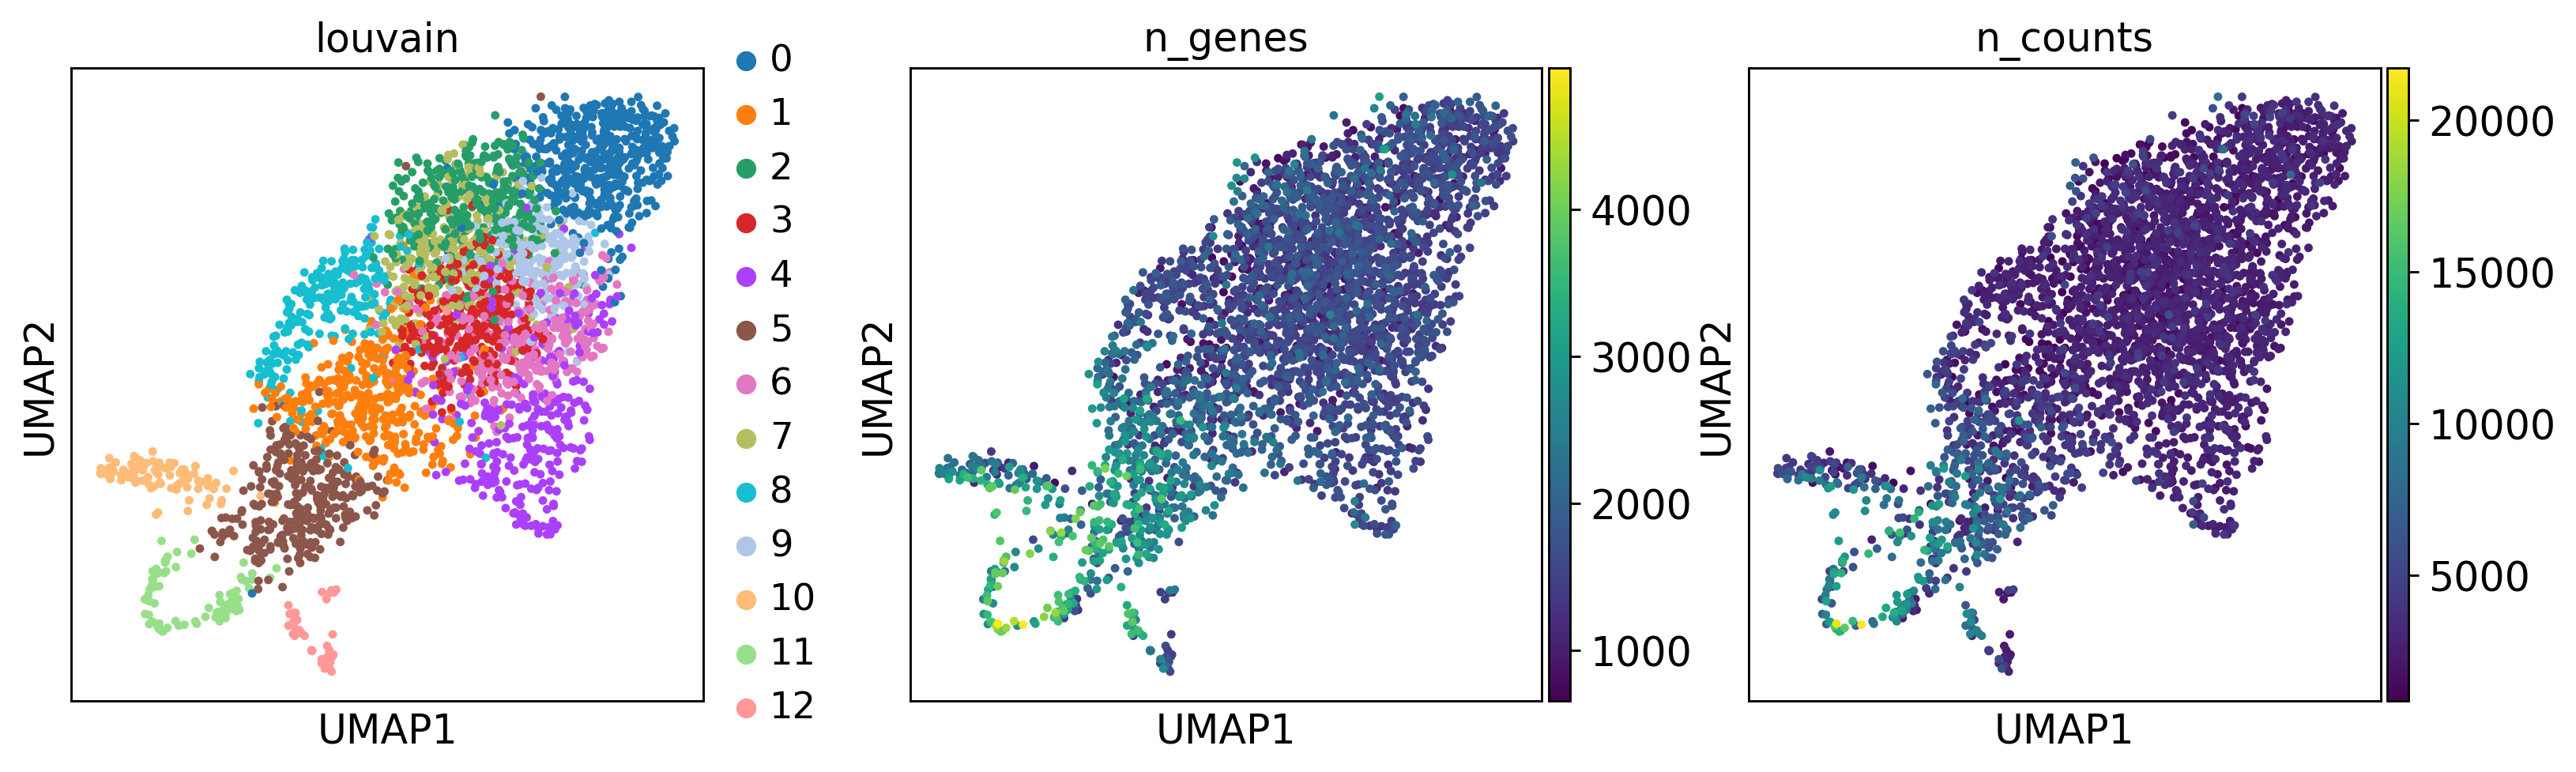

In [13]:
sc.tl.louvain(wt, resolution=1.6)
sc.pl.umap(wt, color=['louvain','n_genes','n_counts'])

In [14]:
mean_cellType = np.empty((len(wt.obs['louvain'].unique()), wt.raw.shape[1]), 
                           dtype=float, order='C')

In [15]:
raw_adata = wt.raw.X.toarray()

In [16]:
for i in range(0, len(wt.obs['louvain'].unique())):
    #print(adata.obs['phenograph'].unique()[i])
    mean_cellType[i,:] = np.mean(raw_adata[wt.obs['louvain'] == wt.obs['louvain'].unique()[i], :], axis = 0)

In [17]:
mean_df = pd.DataFrame(np.corrcoef(mean_cellType), index = wt.obs['louvain'].unique(), columns = wt.obs['louvain'].unique())

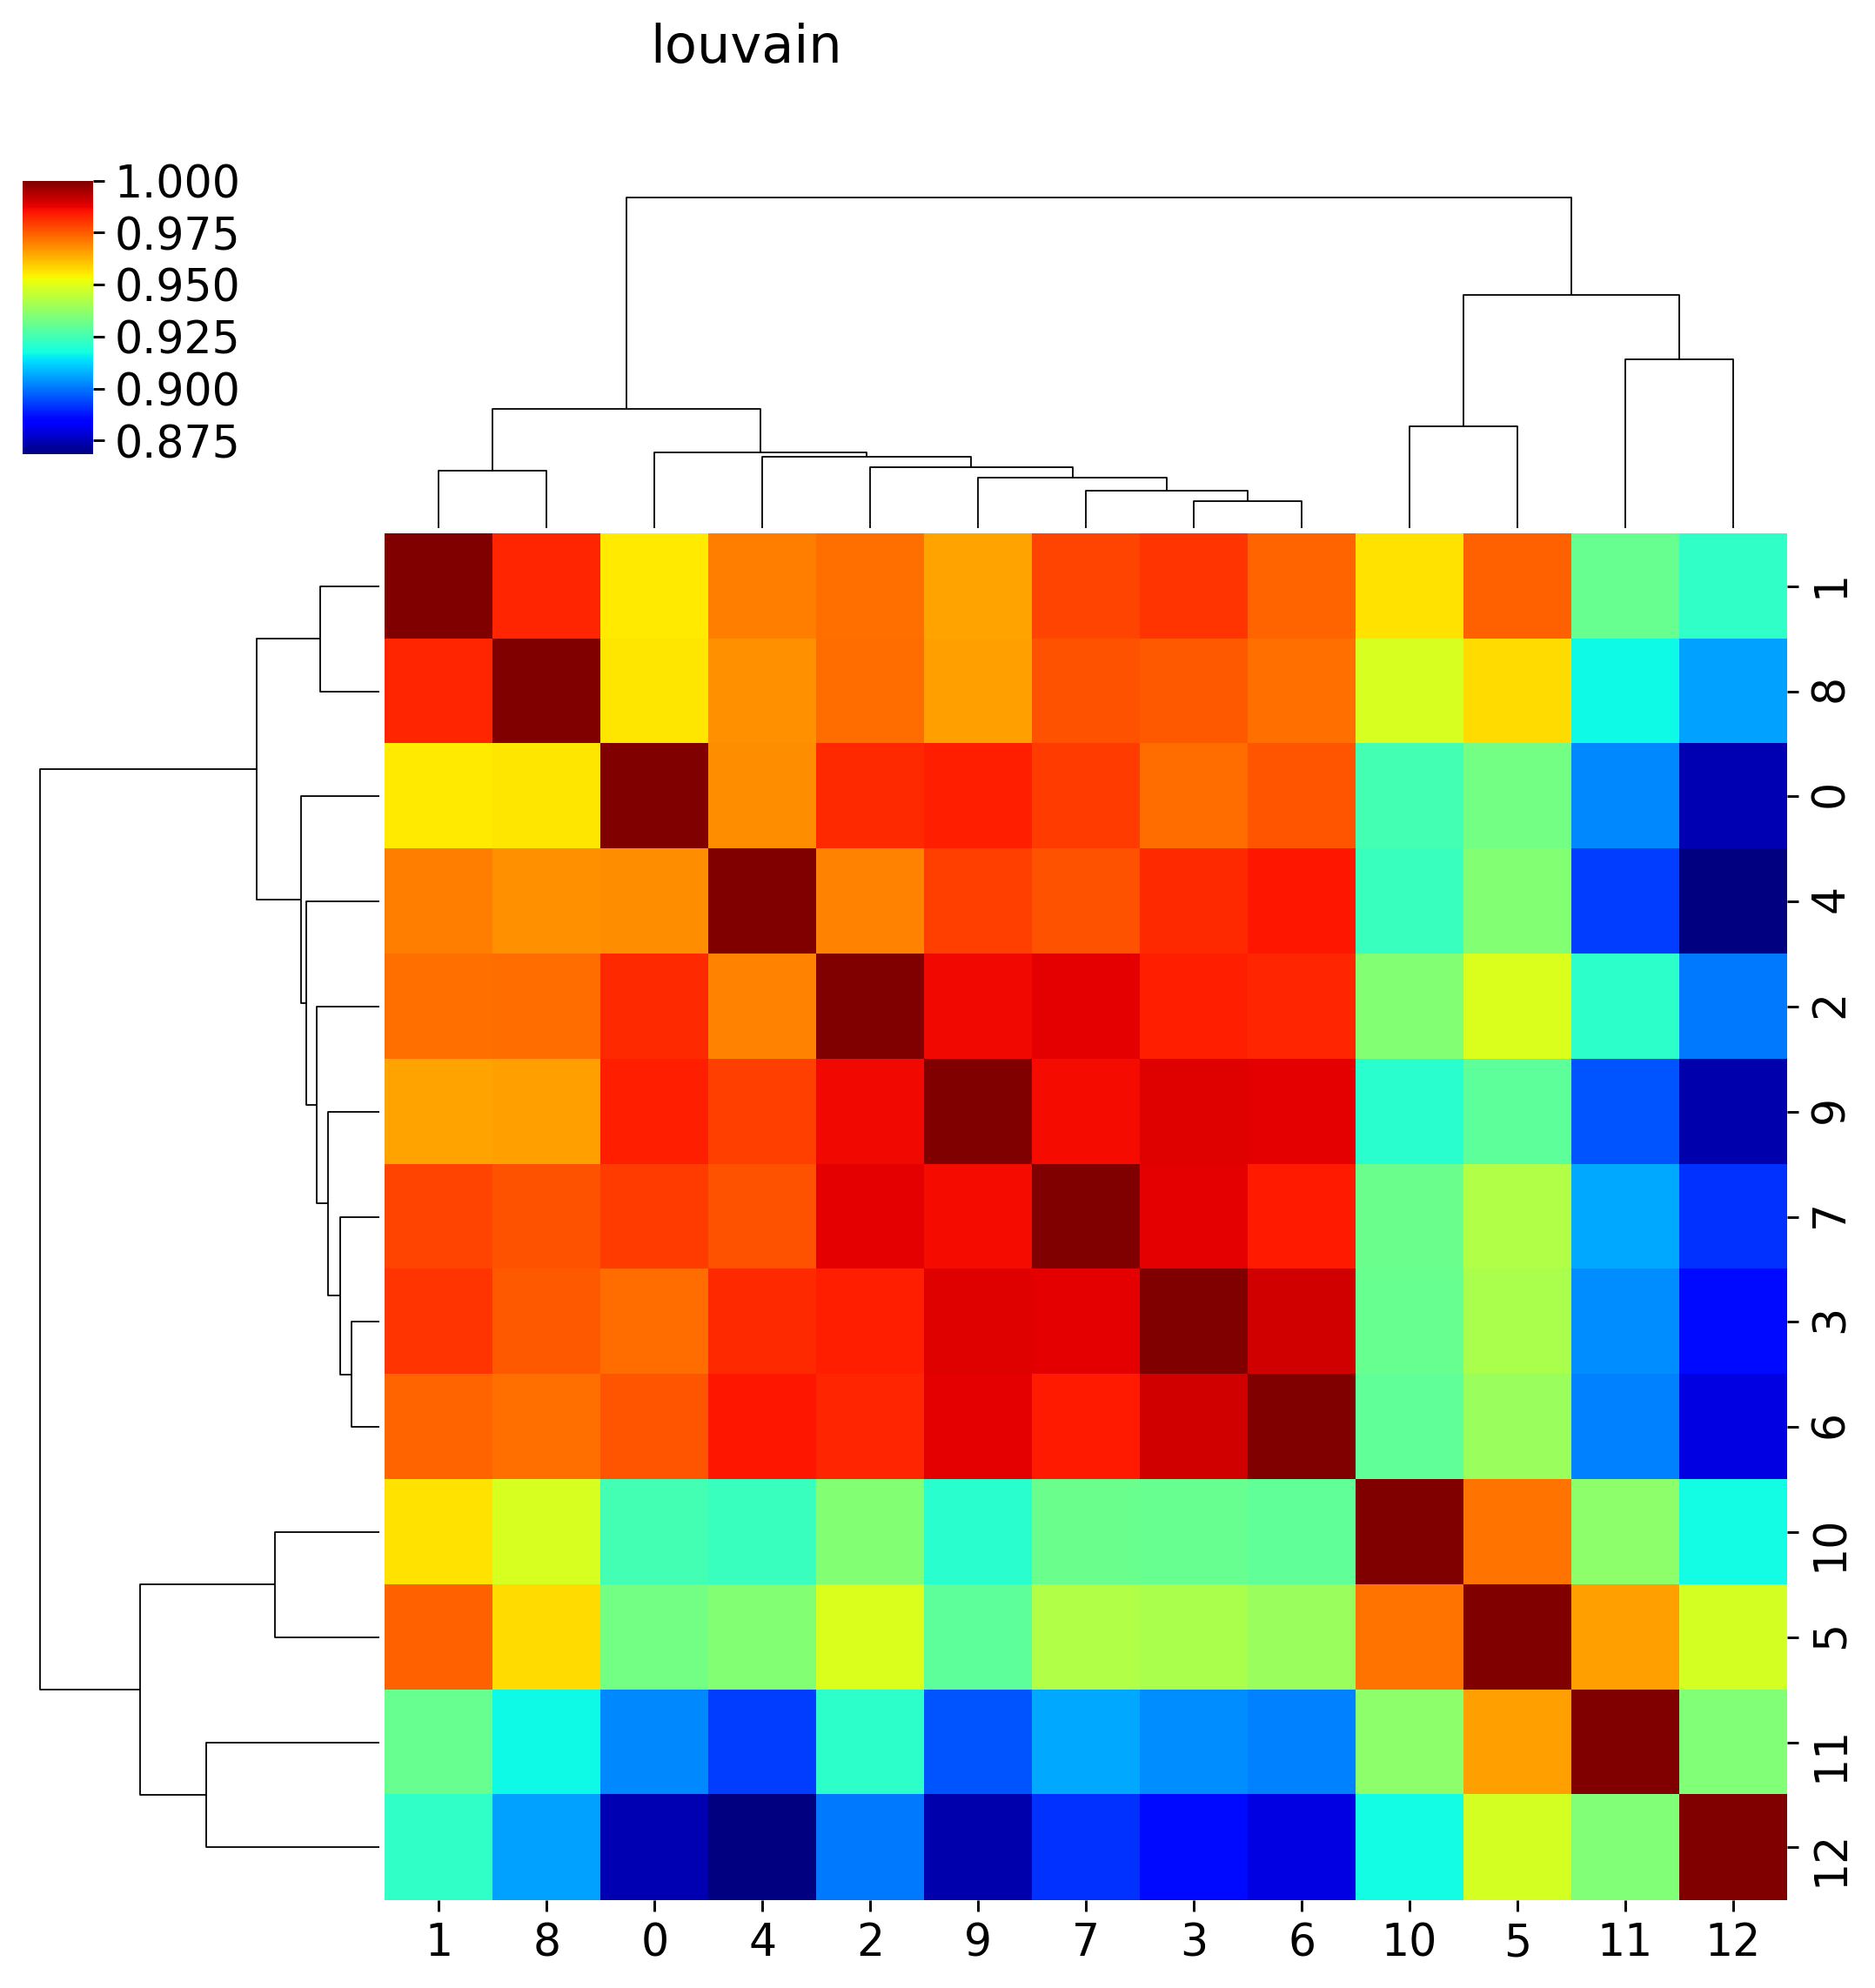

In [18]:
import seaborn
ax = seaborn.clustermap(mean_df, cmap="jet").fig.suptitle('louvain') 

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


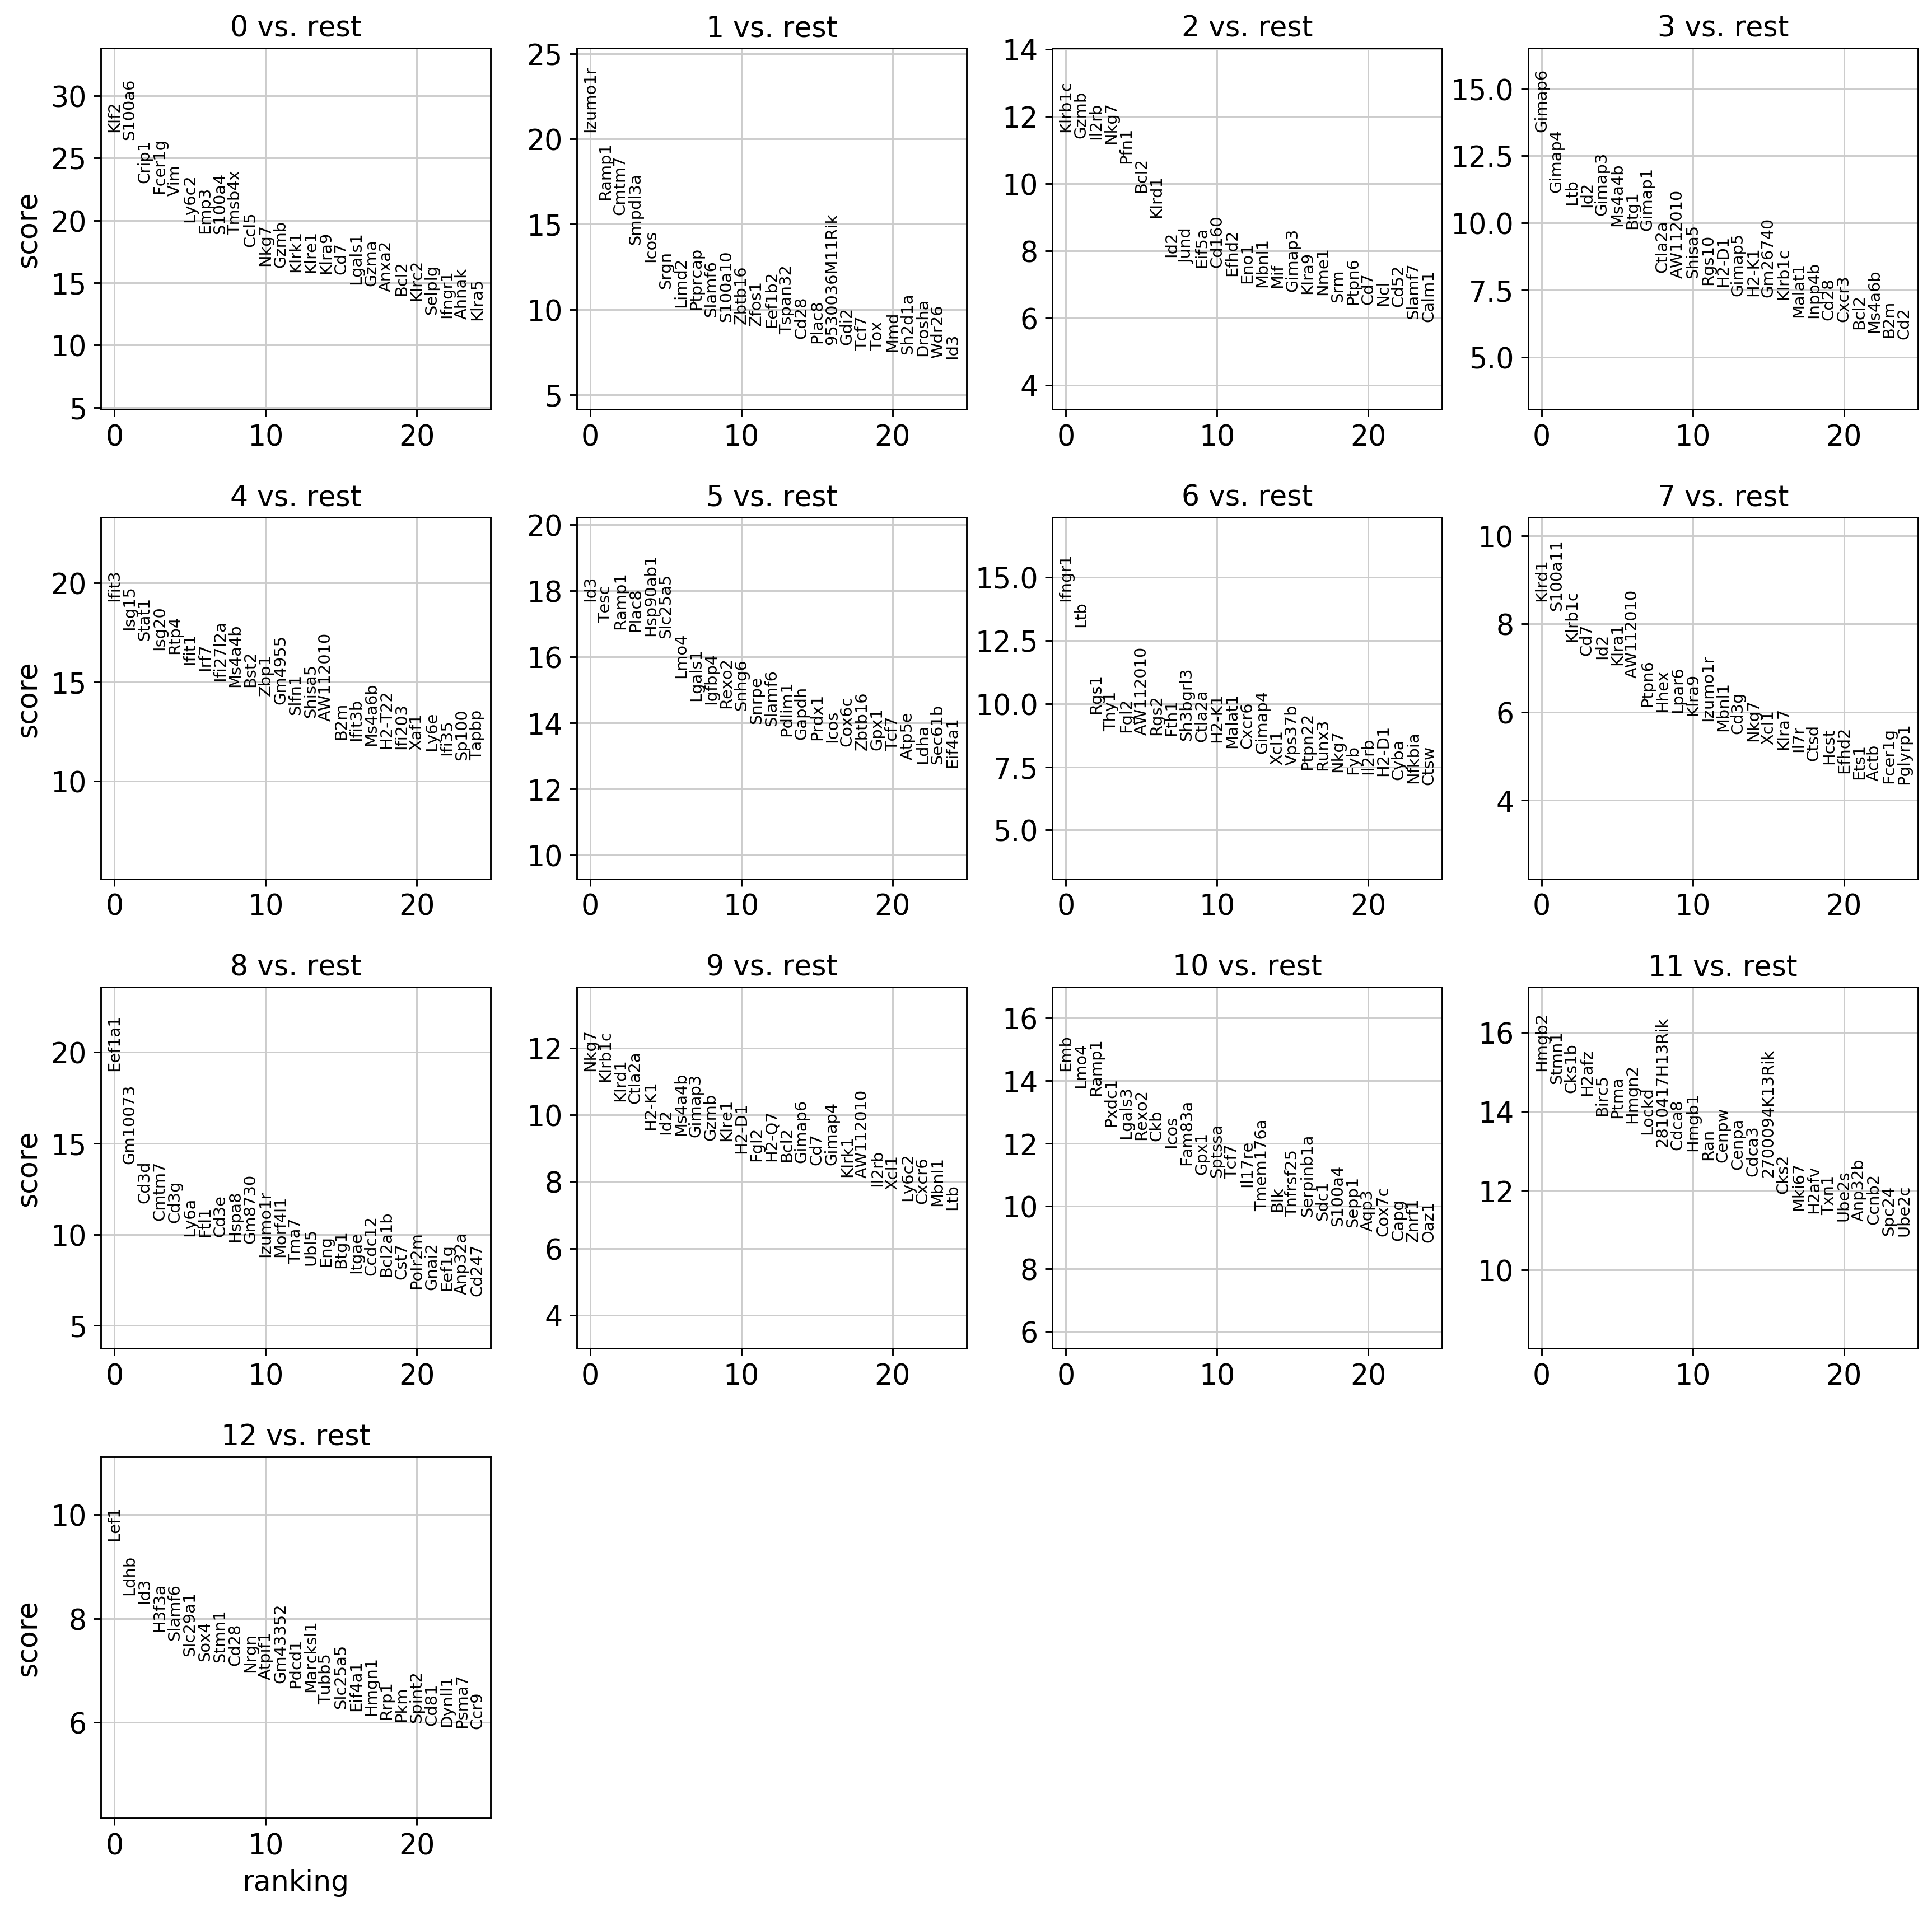

In [19]:
sc.tl.rank_genes_groups(wt, 'louvain', method='wilcoxon')
sc.pl.rank_genes_groups(wt, n_genes=25, sharey=False)

In [20]:
pd.DataFrame(wt.uns['rank_genes_groups']['names']).head(10)

0        1       2         3         4         5         6         7  \
0    Klf2  Izumo1r  Klrb1c    Gimap6     Ifit3       Id3    Ifngr1     Klrd1   
1  S100a6    Ramp1    Gzmb    Gimap4     Isg15      Tesc       Ltb   S100a11   
2   Crip1    Cmtm7   Il2rb       Ltb     Stat1     Ramp1      Rgs1    Klrb1c   
3  Fcer1g  Smpdl3a    Nkg7       Id2     Isg20     Plac8      Thy1       Cd7   
4     Vim     Icos    Pfn1    Gimap3      Rtp4  Hsp90ab1      Fgl2       Id2   
5   Ly6c2     Srgn    Bcl2    Ms4a4b     Ifit1   Slc25a5  AW112010     Klra1   
6    Emp3    Limd2   Klrd1      Btg1      Irf7      Lmo4      Rgs2  AW112010   
7  S100a4  Ptprcap     Id2    Gimap1  Ifi27l2a    Lgals1      Fth1     Ptpn6   
8  Tmsb4x   Slamf6    Jund    Ctla2a    Ms4a4b    Igfbp4  Sh3bgrl3      Hhex   
9    Ccl5  S100a10   Eif5a  AW112010      Bst2     Rexo2    Ctla2a     Lpar6   

         8       9      10             11       12  
0   Eef1a1    Nkg7     Emb          Hmgb2     Lef1  
1  Gm10073  Klrb1c    Lmo4          Stmn1     Ldhb  
2     Cd3d   Klrd1   Ramp1          Cks1b      Id3  
3    Cmtm7  Ctla2a   Pxdc1          H2afz    H3f3a  
4     Cd3g   H2-K1  Lgals3          Birc5   Slamf6  
5     Ly6a     Id2   Rexo2           Ptma  Slc29a1  
6     Ftl1  Ms4a4b     Ckb          Hmgn2     Sox4  
7     Cd3e  Gimap3    Icos          Lockd    Stmn1  
8    Hspa8    Gzmb  Fam83a  2810417H13Rik     Cd28  
9   Gm8730   Klre1    Gpx1          Cdca8     Nrgn

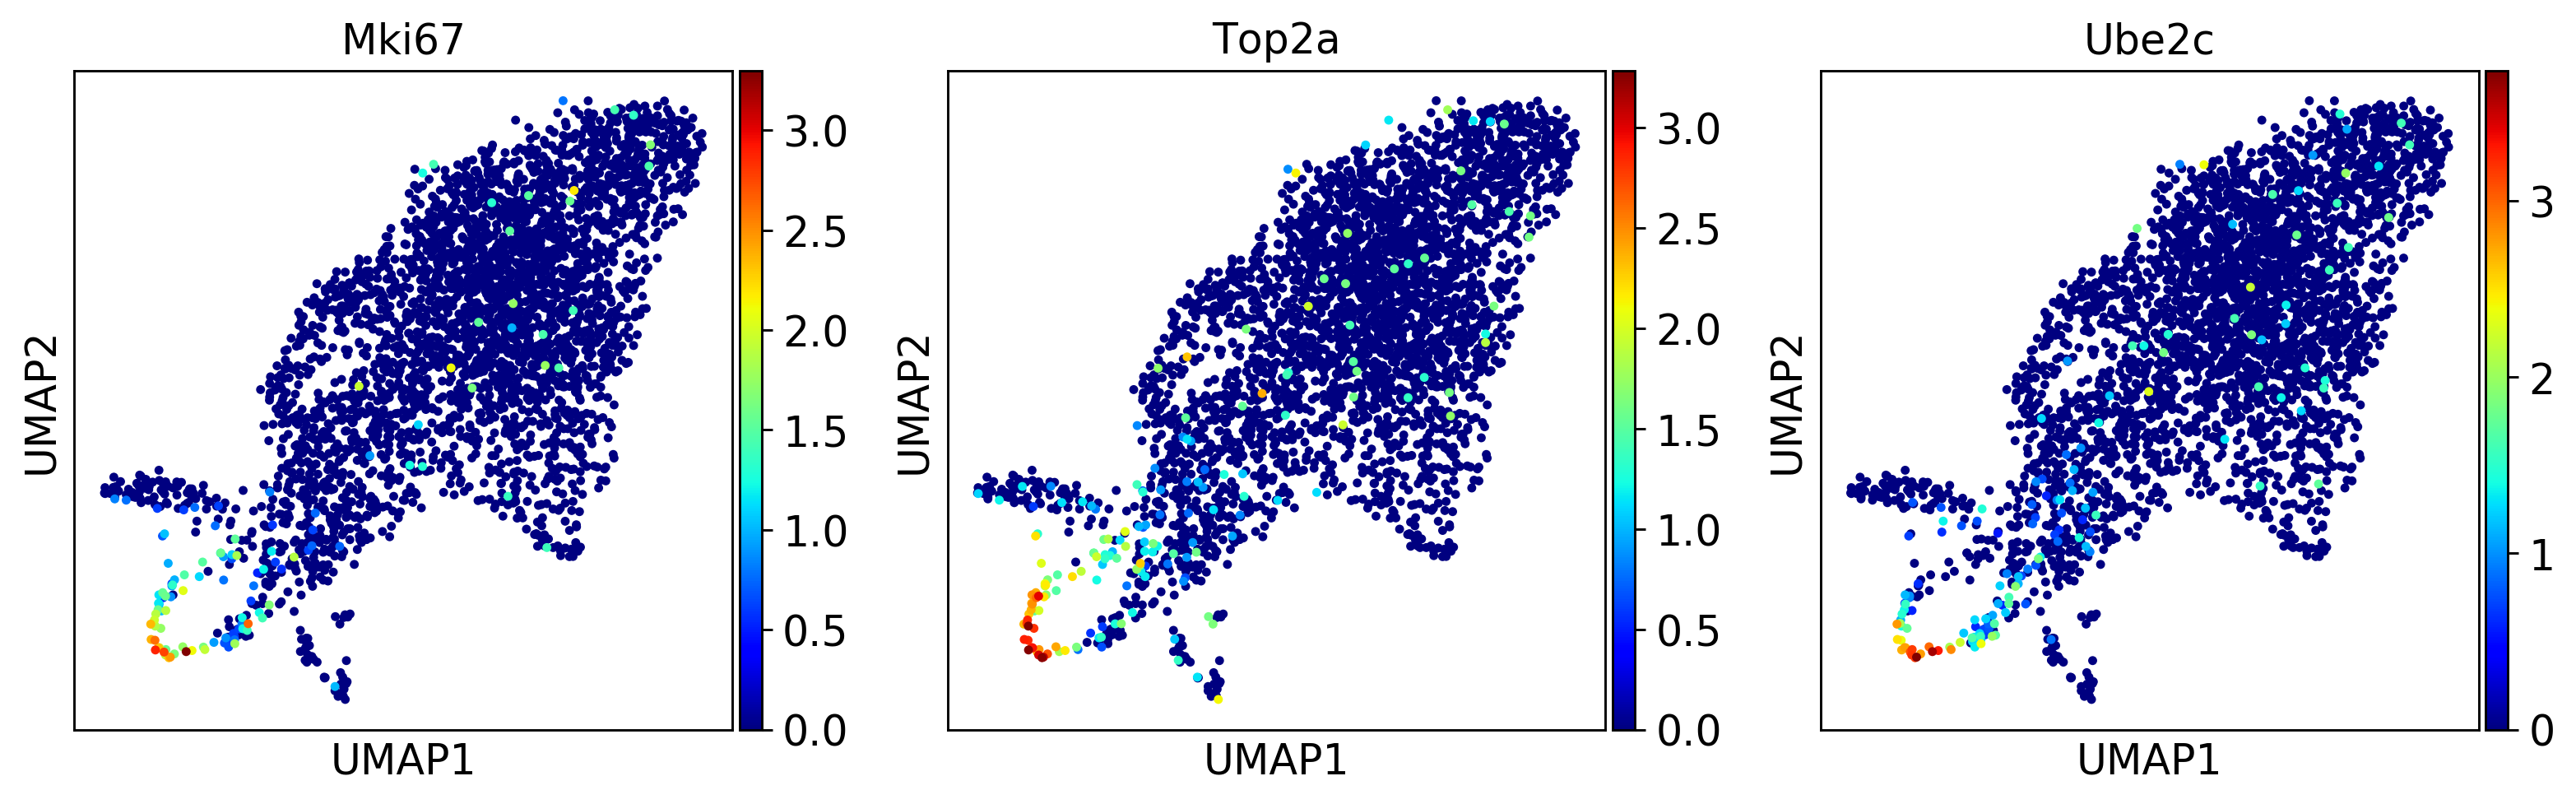

In [21]:
sc.pl.umap(wt, color=['Mki67', 'Top2a', 'Ube2c'], color_map="jet") # Cycling

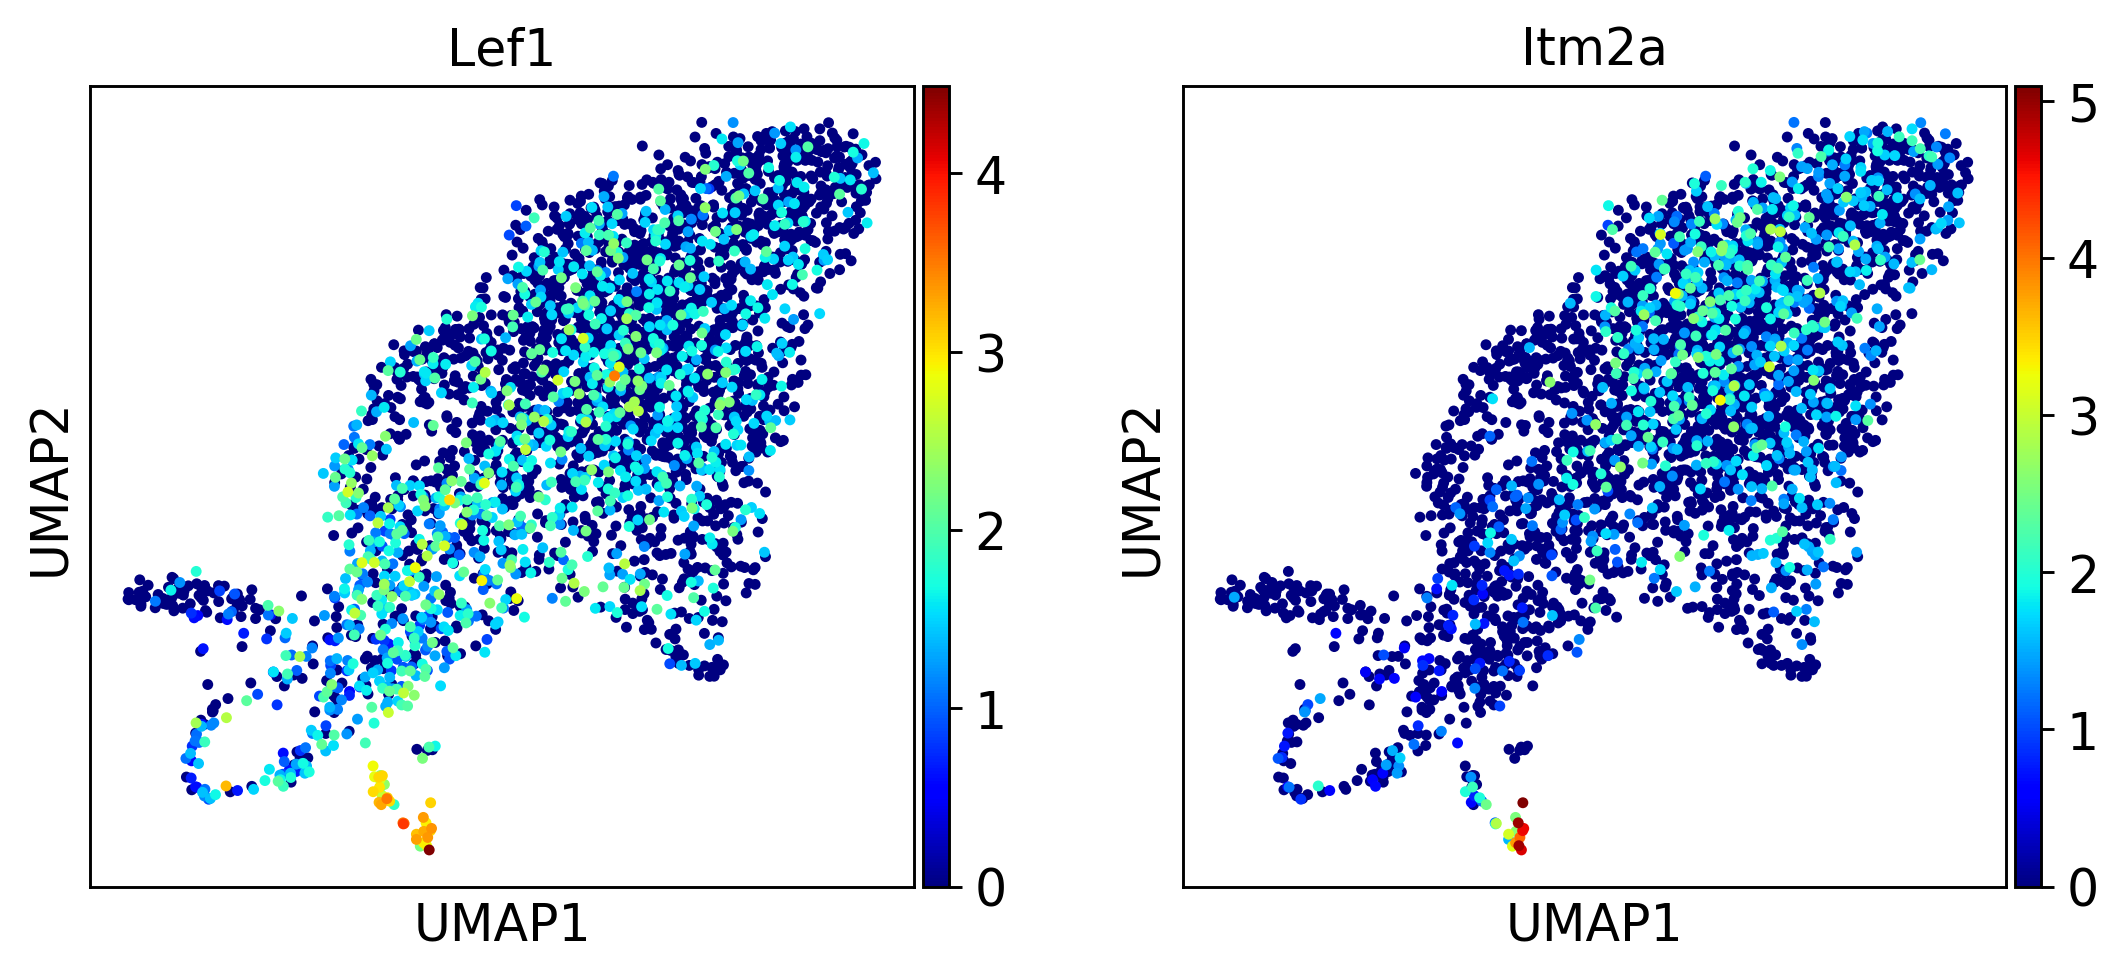

In [22]:
sc.pl.umap(wt, color=['Lef1','Itm2a'], color_map="jet") # NKT0

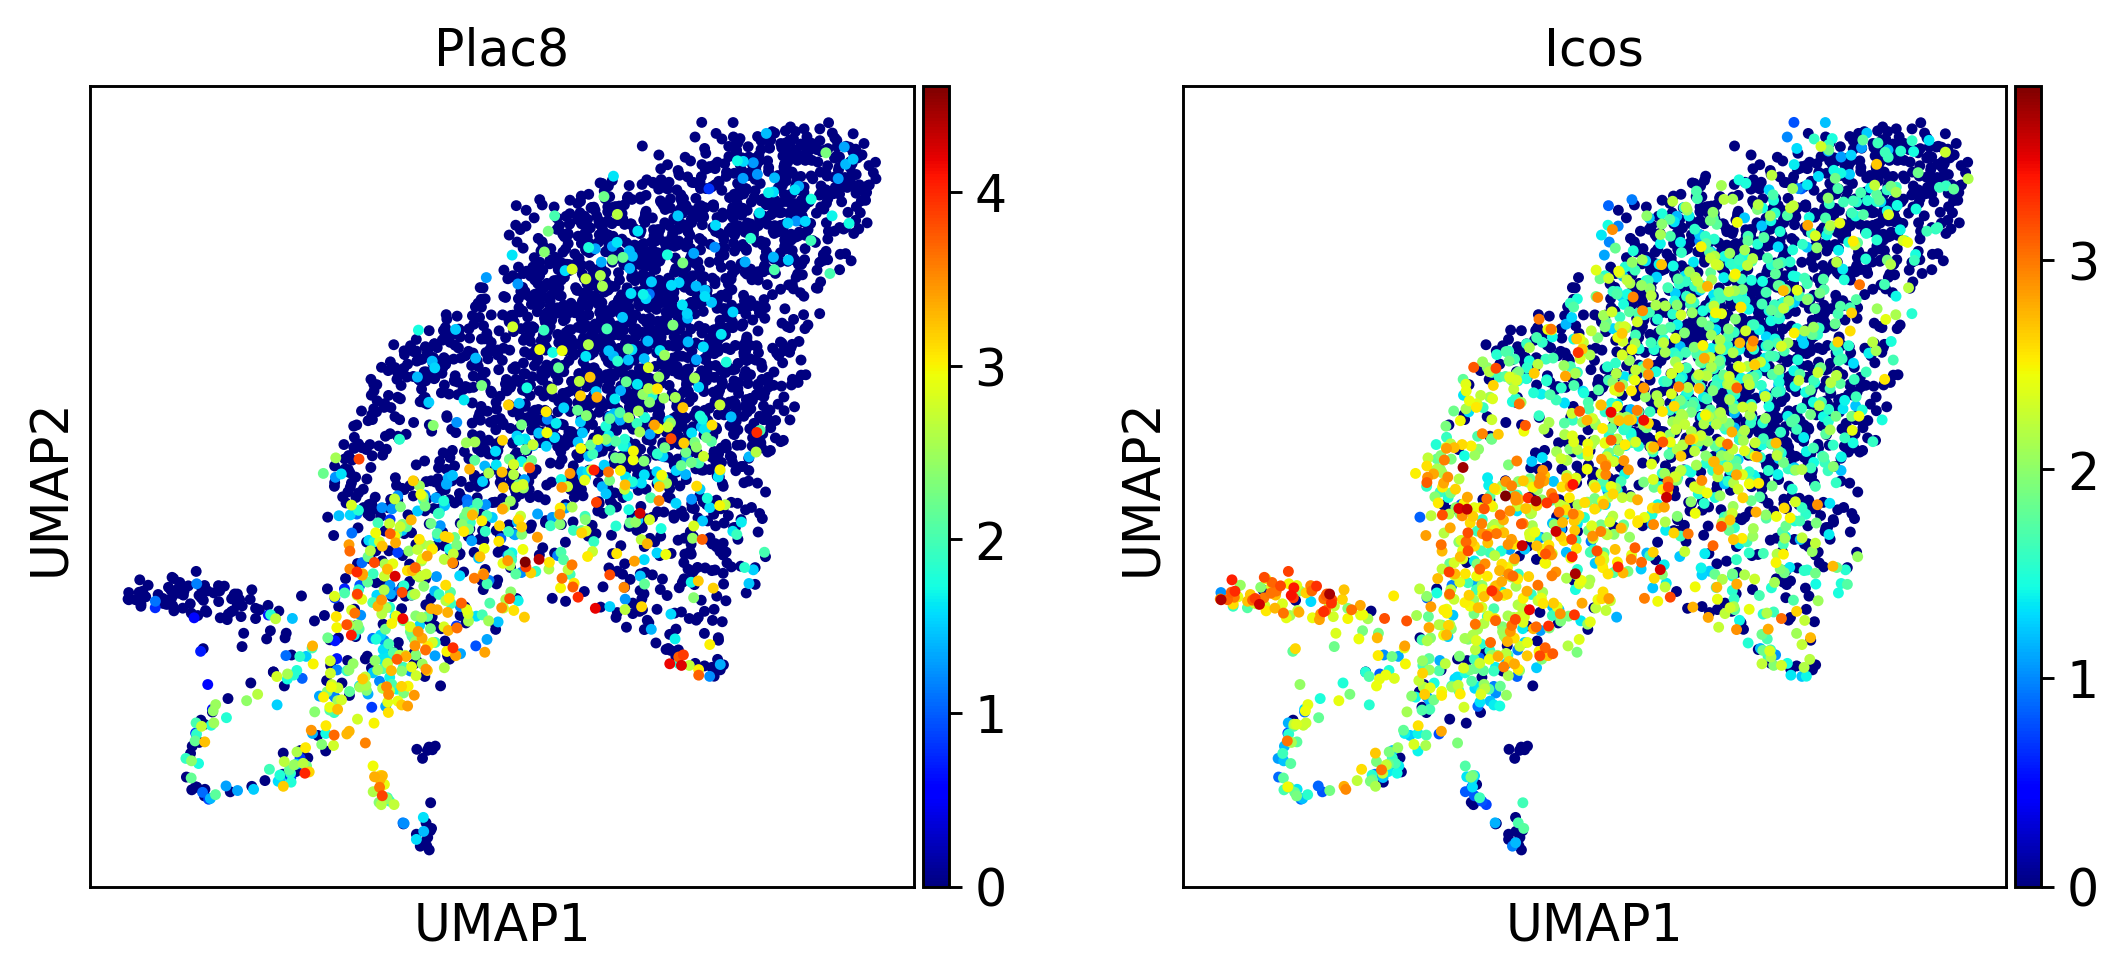

In [23]:
sc.pl.umap(wt, color=['Plac8','Icos'], color_map="jet") # NKT2

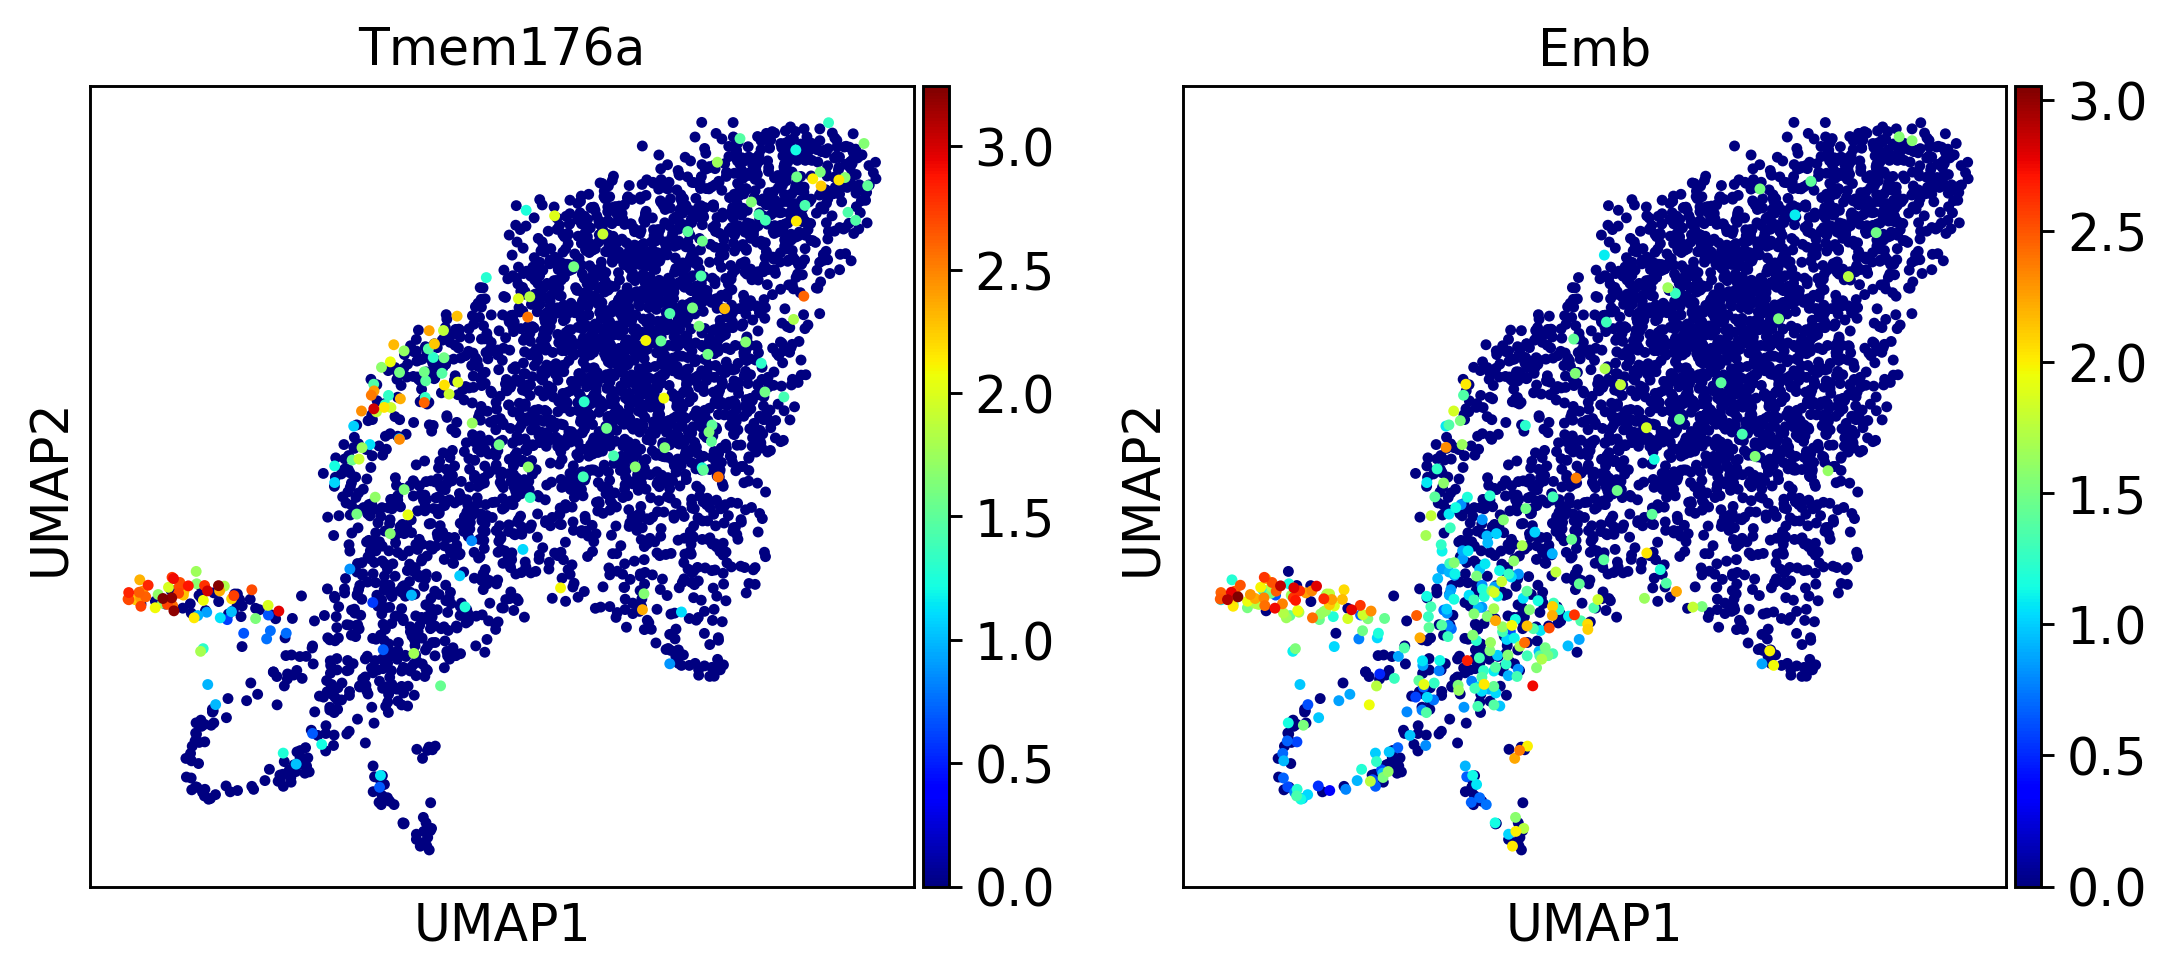

In [24]:
sc.pl.umap(wt, color=['Tmem176a','Emb'], color_map="jet") # NKT17

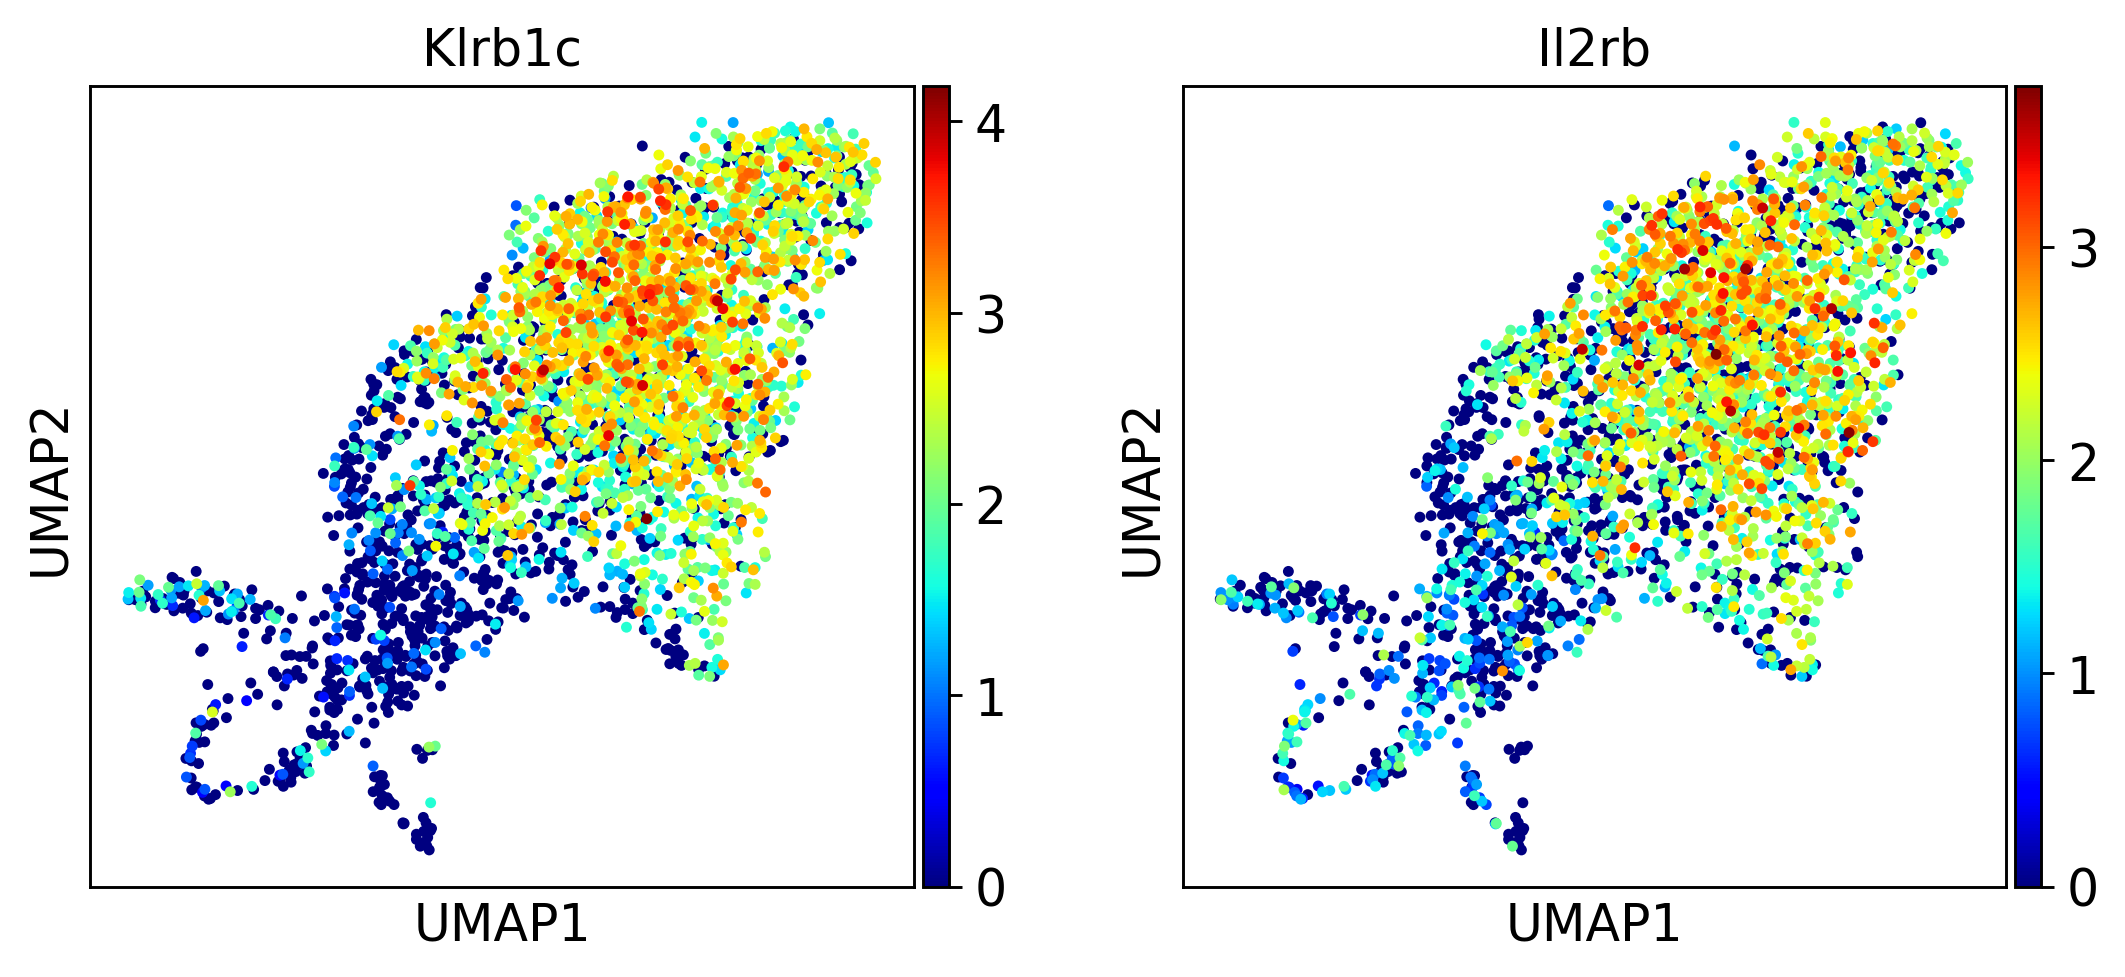

In [25]:
sc.pl.umap(wt, color=['Klrb1c','Il2rb'], color_map="jet") # NKT1

In [ ]:
sc.pl.umap(wt, color=['Ifit1','Ifit3','Isg15'], color_map="jet") # NKT1d

In [ ]:
sc.pl.umap(wt, color=['Fhl2'], color_map="jet") # NKT2a

In [ ]:
sc.pl.umap(wt, color=['louvain'], legend_loc = 'on data', legend_fontsize = 6)

In [ ]:
marker_genes = ['Lef1','Itm2a','Mki67','Top2a','Zbtb16','Plac8','Izumo1r','Ifit1','Ifit3','Isg15','Ly6a','Fhl2','Nkg7','Fcer1g','Gzma','Gzmb','Rorc','Serpinb1a','Tmem176a','Tmem176b']
ax = sc.pl.dotplot(wt, marker_genes, groupby='louvain')

In [ ]:
new_cluster_names = {
    '0':'NKT1c', '1':'NKT2b', '2':'NKT1b', '3':'NKT1b', '4':'NKT1d',
    '5':'NKT2a','6':'NKT1b', '7':'NKT1b', '8':'NKT1a', '9':'NKT1b',
    '10':'NKT17', '11':'Cycling NKT', '12':'NKT0'}

In [ ]:
vect = []
for i in range(0, len(wt.obs['louvain'])):
    vect = vect + [new_cluster_names[str(wt.obs['louvain'][i])]]
    
wt.obs['cell_type'] = vect

# or
#adata.obs['louvain'].cat.categories
#adata.rename_categories('louvain', ['TA', 'EP (early)', 'Stem', 'Goblet', 'EP (stress)', 'Enterocyte', 'Paneth', 'Enteroendocrine', 'Tuft'])
#adata.obs['louvain'].value_counts()



In [ ]:
sc.pl.umap(wt, color='cell_type', title='', frameon=False)

In [ ]:
wt.obs['cell_type'].cat.categories
wt.obs['cell_type'].cat.reorder_categories(['NKT0','Cycling NKT','NKT17','NKT2a','NKT2b','NKT1a','NKT1b','NKT1c','NKT1d'], inplace = True)
wt.uns['cell_type_colors'] = [ '#A31E22', # NKT0
                                '#F3766E', # Cycling NKT 
                                '#2da9d2', # NKT17
                                '#FEC85A', # NKT2a
                                '#FAE600', # NKT2b
                                '#50C878', # NKT1a
                                '#2E8B57', # NKT1b
                                '#0B6623', # NKT1c
                                '#4CBB17'] # NKT1d

In [ ]:
sc.pl.umap(wt, color='cell_type', title='wt', frameon=False)

In [ ]:
wt.obs.groupby(["cell_type"]).apply(len)

In [ ]:
wt.shape

# Gene markers

In [ ]:
sc.tl.rank_genes_groups(wt, 'cell_type', method='wilcoxon', n_genes=200)

In [ ]:
pd.DataFrame(wt.uns['rank_genes_groups']['names']).head(20)

In [ ]:
cell_type_nb = {}
list_cell_type = wt.obs['cell_type'].unique().tolist()
list_cell_type.sort()
for i in range(0, len(wt.obs['cell_type'].unique().tolist())):
    cell_type_nb[list_cell_type[i]] = i

#inverted_cell_type_nb = dict([[v,k] for k,v in cell_type_nb.items()])
#inverted_cell_type_nb

In [ ]:
clusters = []
genes = []
logFC = []
score = []
pvals = []
pvals_adj = []

for cl in cell_type_nb.keys():
    clusters = clusters + ([cl]*len(wt.uns['rank_genes_groups']['names'][str(cl)]))
    genes = genes + wt.uns['rank_genes_groups']['names'][str(cl)].tolist()
    logFC = logFC + wt.uns['rank_genes_groups']['logfoldchanges'][str(cl)].tolist()
    score = score + wt.uns['rank_genes_groups']['scores'][str(cl)].tolist()
    pvals = pvals + wt.uns['rank_genes_groups']['pvals'][str(cl)].tolist()
    pvals_adj = pvals_adj + wt.uns['rank_genes_groups']['pvals_adj'][str(cl)].tolist()
    

In [ ]:
markers = pd.DataFrame(data = {'clusters': clusters,
                              'genes':genes,
                              'logFC':logFC,
                              'score':score,
                              'pvals':pvals,
                              'pvals_adj':pvals_adj,
                              })

In [ ]:
markers.to_csv(path_or_buf = 'wt.markers.csv', sep = ',', index = False)

In [ ]:
marker_genes = ['Lef1','Itm2a','Mki67','Top2a','Zbtb16','Plac8','Izumo1r','Ifit1','Ifit3','Isg15','Ly6a','Fhl2','Nkg7','Fcer1g','Gzma','Gzmb','Rorc','Serpinb1a','Tmem176a','Tmem176b']
ax = sc.pl.dotplot(wt, marker_genes, groupby='cell_type')

# Transcription factor dotplot

In [ ]:
marker_genes = ['Blk', 'Rorc', 'Tbx21', 'Tox', 'Zbtb16', 'Gata3', 'Sox4','Lef1']
ax = sc.pl.dotplot(wt, marker_genes, groupby='cell_type', save='fig.1h.pdf')

#sc.pl.matrixplot(wt, marker_genes, groupby='cell_type', dendrogram=True,
#                      use_raw=False, vmin=-3, vmax=3, cmap='bwr',  swap_axes=True, figsize=(5,6))


In [ ]:
sc.pl.matrixplot(wt, marker_genes, groupby='cell_type', cmap='bwr')

# Saving cellbrowser

In [ ]:
wt.write('./output/wt.ann.h5ad')

In [ ]:
wt.obs['umap_1'] = pd.DataFrame(wt.obsm['X_umap']).iloc[:,0].tolist()
wt.obs['umap_2'] = pd.DataFrame(wt.obsm['X_umap']).iloc[:,1].tolist()
wt.obs.to_csv(path_or_buf = 'output/metadata.wt.tsv', sep = '\t', index = True)

sc.external.exporting.cellbrowser(wt, 
                                 'cellbrowser/wt', 
                                 'wt', 
                                  annot_keys=['cell_type', 'louvain', 'sample', 
                                              'n_counts', 'n_genes', 'percent_mito', 'percent_ribo'], 
                                 cluster_field='cell_type', nb_marker=30,
                                 skip_matrix=False, do_debug=True)

# Remove Cycling and NKT1d

In [ ]:
wt = sc.read_h5ad('./output/wt.ann.h5ad')
cell_bool = []
for x in wt.obs['cell_type']:
    cell_bool = cell_bool + [x in ['NKT0','NKT17','NKT2a','NKT2b','NKT1a','NKT1b','NKT1c']]

In [ ]:
list_of_cell_names = wt.obs.loc[cell_bool, :].index.tolist()
wt = wt[list_of_cell_names, ]
wt.shape

# Gatting dotplot

In [ ]:
marker_genes = ['Sdc1', 'Klrb1c', 'Ly6a', 'Izumo1r','Cd24a']
ax = sc.pl.dotplot(wt, marker_genes, groupby='cell_type', save='fig.5a.pdf')

# thymus egress dotplot

In [ ]:
wt = sc.read_h5ad('./output/wt.ann.h5ad')
cell_bool = []
for x in wt.obs['cell_type']:
    cell_bool = cell_bool + [x in ['NKT0','NKT17','NKT2a','NKT2b','NKT1a','NKT1b','NKT1c']]

In [ ]:
list_of_cell_names = wt.obs.loc[cell_bool, :].index.tolist()
wt = wt[list_of_cell_names, ]
wt.shape

In [ ]:
marker_genes = ['S1pr1', 'Klf2', 'Emp3', 'S100a4', 'S100a6', 'Cd69', 'Cxcr3']
ax = sc.pl.dotplot(wt, marker_genes, groupby='cell_type', save='fig.6a.pdf')

# Correlation heatmap

In [ ]:
mean_cellType = np.empty((len(wt.obs['cell_type'].unique()), wt.raw.shape[1]), 
                           dtype=float, order='C')

In [ ]:
raw_adata = wt.raw.X.toarray()

In [ ]:
for i in range(0, len(wt.obs['cell_type'].unique())):
    #print(adata.obs['phenograph'].unique()[i])
    mean_cellType[i,:] = np.mean(raw_adata[wt.obs['cell_type'] == wt.obs['cell_type'].unique()[i], :], axis = 0)

In [ ]:
mean_df = pd.DataFrame(np.corrcoef(mean_cellType), index = wt.obs['cell_type'].unique(), columns = wt.obs['cell_type'].unique())

In [ ]:
ax = sns.clustermap(mean_df, cmap="bwr")
ax.savefig("figure.6c.pdf")

# NKT2a versus NKT2b differential expression

In [ ]:
wt = sc.read_h5ad('./output/wt.ann.h5ad')
cell_bool = []
for x in wt.obs['cell_type']:
    cell_bool = cell_bool + [x in ['NKT2a','NKT2b']]

In [ ]:
list_of_cell_names = wt.obs.loc[cell_bool, :].index.tolist()
wt = wt[list_of_cell_names, ]
wt.shape

In [ ]:
sc.tl.rank_genes_groups(wt, groupby='cell_type', key_added='group_DE_results', n_genes=200)

In [ ]:
cell_type_nb = {}
list_cell_type = wt.obs['cell_type'].unique().tolist()
list_cell_type.sort()
for i in range(0, len(wt.obs['cell_type'].unique().tolist())):
    cell_type_nb[list_cell_type[i]] = i

#inverted_cell_type_nb = dict([[v,k] for k,v in cell_type_nb.items()])
#inverted_cell_type_nb

In [ ]:
clusters = []
genes = []
logFC = []
score = []
pvals = []
pvals_adj = []

for cl in cell_type_nb.keys():
    clusters = clusters + ([cl]*len(wt.uns['group_DE_results']['names'][str(cl)]))
    genes = genes + wt.uns['group_DE_results']['names'][str(cl)].tolist()
    logFC = logFC + wt.uns['group_DE_results']['logfoldchanges'][str(cl)].tolist()
    score = score + wt.uns['group_DE_results']['scores'][str(cl)].tolist()
    pvals = pvals + wt.uns['group_DE_results']['pvals'][str(cl)].tolist()
    pvals_adj = pvals_adj + wt.uns['group_DE_results']['pvals_adj'][str(cl)].tolist()
    

In [ ]:
markers = pd.DataFrame(data = {'clusters': clusters,
                              'genes':genes,
                              'logFC':logFC,
                              'score':score,
                              'pvals':pvals,
                              'pvals_adj':pvals_adj,
                              })

In [ ]:
markers.to_csv(path_or_buf = 'nkt2.markers.csv', sep = ',', index = False)

In [ ]:
sc.pl.rank_genes_groups_violin(wt, use_raw=True, key='group_DE_results', groups=["NKT2a"], gene_names=wt.uns['group_DE_results']['names']["NKT2a"][1:10])
sc.pl.rank_genes_groups_violin(wt, use_raw=True, key='group_DE_results', groups=["NKT2a"], gene_names=wt.uns['group_DE_results']['names']["NKT2a"][90:100])

In [ ]:
sc.pl.rank_genes_groups_violin(wt, use_raw=True, key='group_DE_results', groups=["NKT2b"], gene_names=wt.uns['group_DE_results']['names']["NKT2b"][1:10])
sc.pl.rank_genes_groups_violin(wt, use_raw=True, key='group_DE_results', groups=["NKT2b"], gene_names=wt.uns['group_DE_results']['names']["NKT2b"][90:100])

In [ ]:
nkt2_genes = ['Tesc','Lgals1','S100a6','Vim','Thy1','Crip1','Lmo4','Pdlim1','Rgcc','Txn1','Stmn1','Emp3','Arl4c','Cxcr6','Igfbp4','Rora','Lgals3','H2afz','Cfl1','Cox6c','Ccr9','Dbi','Prdx1','Hmgn2','Dut','Ldha','Emb','Gpx1','Ppia','Izumo1r','Tpt1','Hcst','Ctsw','Malat1','Ctsd','Btg1','Nkg7','Klrb1c','Cmtm7','Maf','S100a11','H2-D1','H2-K1','H2-Q7','Eef1a1','AW112010','Ypel3','Cd53','Gimap4','Smpdl3a','Fxyd5','Serinc3','Srgn','Gimap5','Ptprcap','Cxcr3','Rsrp1','Pfdn5']
sc.pl.matrixplot(wt, nkt2_genes, groupby='cell_type', save='figure.1sup.pdf')

In [ ]:
ax = sc.pl.dotplot(wt, nkt2_genes, groupby='cell_type', save='figure.1sup-2.pdf')

In [ ]:
result = wt.uns['group_DE_results']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges', 'scores', 'pvals']}).head(5)

In [ ]:
sc.pl.umap(wt, color=['Rora','Cxcr6','Izumo1r',"Nkg7"], color_map="jet") # NKT1

# Correlation 

In [ ]:
wt = sc.read_h5ad('./output/wt.ann.h5ad')
cell_bool = []
for x in wt.obs['cell_type']:
    cell_bool = cell_bool + [x in ['NKT0','NKT17','NKT2a','NKT2b','NKT1a','NKT1b','NKT1c']]

In [ ]:
list_of_cell_names = wt.obs.loc[cell_bool, :].index.tolist()
wt = wt[list_of_cell_names, ]
wt.shape

In [ ]:
mean_cellType = np.empty((len(wt.obs['cell_type'].unique()), wt.raw.shape[1]), 
                           dtype=float, order='C')

In [ ]:
raw_adata = wt.raw.X.toarray()

In [ ]:
for i in range(0, len(wt.obs['cell_type'].unique())):
    #print(adata.obs['phenograph'].unique()[i])
    mean_cellType[i,:] = np.mean(raw_adata[wt.obs['cell_type'] == wt.obs['cell_type'].unique()[i], :], axis = 0)

In [ ]:
mean_df = pd.DataFrame(np.corrcoef(mean_cellType), index = wt.obs['cell_type'].unique(), columns = wt.obs['cell_type'].unique())

In [ ]:
import seaborn
seaborn.palplot(sns.color_palette("Blues"))
ax = seaborn.clustermap(mean_df, cmap="Blues")
ax.savefig("figure.2a.pdf")